# Закономерности, определяющие успешность видеоигр

**Цель:** выявить потенциально популярный продукт, чтобы спланировать рекламную кампанию интернет-магазина "N" на $2017$ год.

**Задача:** выявить закономерности, которые определяют успех игры.

**Дано:** данные до $2016$ года, содержащие исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (Xbox/PlayStation, etc.).

`N` — интернет-магазин, который продаёт видеоигры по всему миру.

<hr>

## Обзор данных

**Импортируем библиотеки и прочитаем данные из папки `github` репозитория.**

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SweexFox/portfolio-projects/main/python-projects/4-successful-games/games.csv')

**Выведем первые 20 строк.**

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Одна строка обозначает информацию о конкретной видеоигре на конкретной платформе.

**Изучим сводную информацию о таблице.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Имеем $11$ колонок и $16715$ строк. В некоторых колонках видны пропуски.**

**Описание колонок:**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В датафрейме есть **неправильные типы данных**:
1. Год релиза (`Year_of_Release`)
2. Оценка критиков (`Critic_Score`)
3. Оценка пользователей (`User_Score`)

Очевидно наблюдаем **пропуски** в:
1. Оценке критиков (`Critic_Score`)
2. Оценке пользователей (`User_Score`)
3. Рейтинге (`Rating`)

<br>

## Предобработка данных

### Названия колонн

Приведём колонки к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

# проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Типы данных колонок

Преобразуем данные в нужные типы.

In [6]:
# год релиза
df['year_of_release'] = df['year_of_release'].astype('Int64')

# оценка критиков
df['critic_score'] = df['critic_score'].astype('Int64')

# оценка пользователей
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')

# проверка
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Год релиза стал целым числом.\
Оценка критиков на метакритике оценивается в целых числах.\
Оценка пользователей должна иметь тип данных дробный. Предварительно мы здесь перевели 'tbd' в пропуски.

### Работа с пропусками

**Определим, в каких колонках есть пропуски**

В годе релиза тоже есть пропуски.

Сделаем срез датафрейма с пропусками в оценках критиков.

In [7]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


С пропусками ничего не поделаешь. Их нужно оставить.\
Почему возникли пропуски? Может быть потому, что игра откровенно плоха и неудачная, если мы видим гигансткие проблемы с продажами.\
Если игра успешная, может быть техническая неполадка при импорте данных.

### Новые колонки

In [8]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN


**Создадим новую колонку, содержащую продажи игры по всем регионам.**

In [9]:
# создадим новую колонну
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [10]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


**Итоги предобработки данных:**
1. Колонки переименованы в соответствии с хорошим стилем.
2. Типы данных поменяны на корректные.
3. Пропуски остались нетронутыми.
4. Создана дополнительная колонка.

<br>

## Исследовательский анализ данных

### Распределение видеоигр по годам

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Создадим сводную таблицу

In [12]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
                  .rename(columns={'name': 'games_cnt'})\
                  .reset_index()
games_by_year

,year_of_release,games_cnt
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


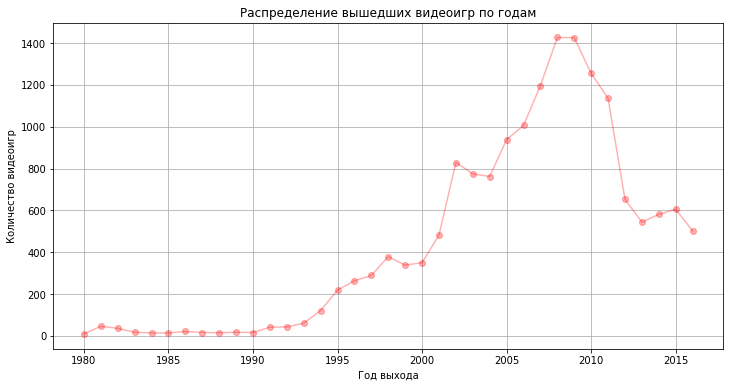

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(games_by_year['year_of_release'],
         games_by_year['games_cnt'],
         marker = 'o',
         color = 'r',
         alpha = 0.3)
plt.title('Распределение вышедших видеоигр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество видеоигр')
plt.grid(True)
plt.show()

Начиная с $1994$ года количество игр начинает расти.\
Нужно не забывать, что одна игра может выйти на нескольких консолях.

### Распределение продаж по платформам

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Создадим сводную таблицу.

In [15]:
# продажи по платформам
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                      .sort_values(by='total_sales', ascending=False)\
                      .reset_index()
sales_by_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


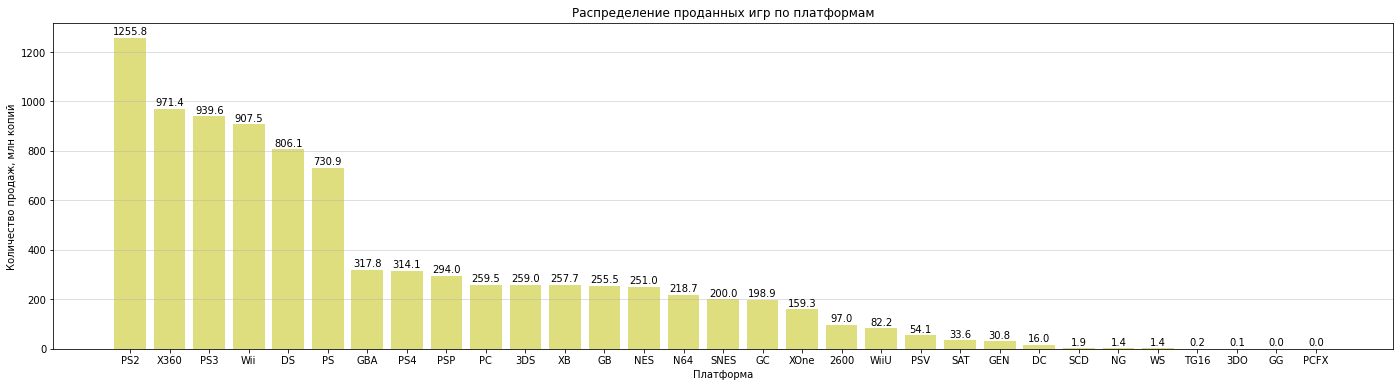

In [16]:
plt.figure(figsize=(24, 6))
bars = plt.bar(sales_by_platform['platform'],
        sales_by_platform['total_sales'],
        color='y',
        alpha=0.5)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)

plt.show()

Игры больше всего продавались на:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS

Таким образом, это топ-6 платформ.

<br>

### Распределение по годам у платформ с наибольшими суммарными продажами

**1. Для начала сделаем сводную таблицу, которая покажет количество продаж игр за каждый год по каждой платформе.**

In [17]:
# сводная таблица
sales_by_platform_year = df.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()
sales_by_platform_year

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52


<br>

**2. Затем получим топ-6 платформ по суммарным продажам.**

Так как на графике распределения выше выделяются первые 6 платформ, то будем считать их.

In [18]:
top_platforms = sales_by_platform.groupby('platform')['total_sales'].sum().nlargest(6).index.to_list()
print(f'Топ-6 платформ: {top_platforms}')

Топ-6 платформ: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


<br>

**3. Отфильтруем данные только по этим платформам.**

In [19]:
top_platforms_data = sales_by_platform_year[sales_by_platform_year['platform'].isin(top_platforms)]
top_platforms_data

,year_of_release,platform,total_sales
8,1985,DS,0.02
47,1994,PS,6.03
55,1995,PS,35.96
64,1996,PS,94.70
70,1997,PS,136.17
...,...,...,...
225,2015,Wii,1.14
227,2015,X360,11.96
231,2016,PS3,3.60
234,2016,Wii,0.18


<br>

**4. Визуализируем, построив линейные диаграммы.**

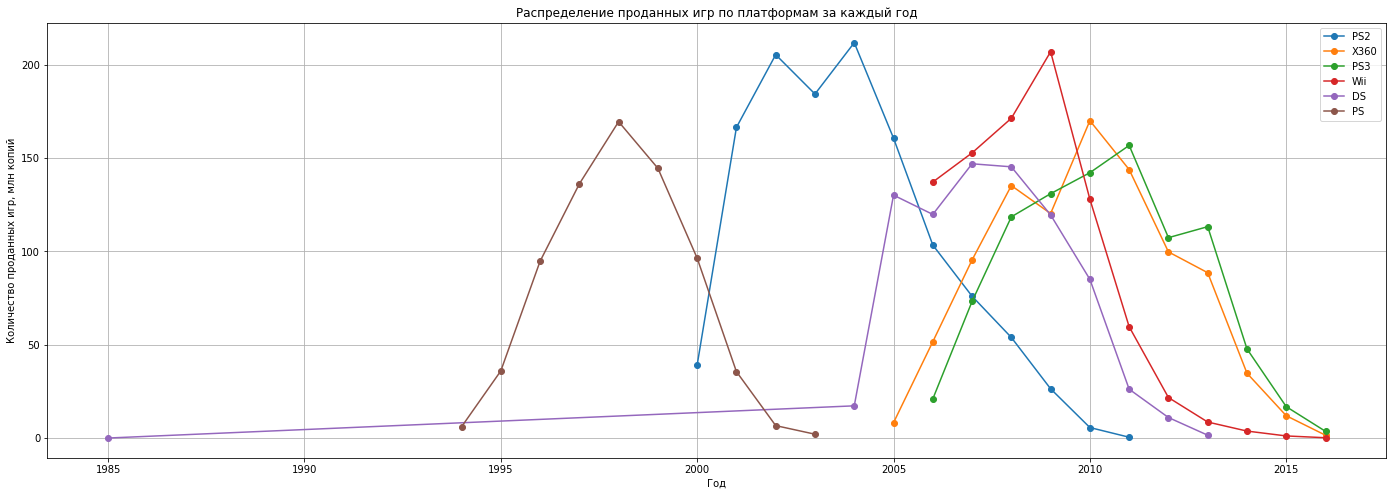

In [20]:
plt.figure(figsize=(24, 8))
for platform in top_platforms:
    data_platform = top_platforms_data[top_platforms_data['platform'] == platform]
    plt.plot(data_platform['year_of_release'], data_platform['total_sales'], label=platform, marker='o')
plt.title('Распределение проданных игр по платформам за каждый год')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр, млн копий')
plt.legend()
plt.grid(True)
plt.show()

Если смотреть на жёлтую столбчатую диаграмму, которая выше, то в $2016$ году приставки от **Sony** имели такую картину за всю историю по продажам: PS2 > PS3 > PS > PS4

Выводы по консолям **PlayStation**: 
* **PS** правила с $1995$ по $2000$ год.
* На смену ей пришла **PS2**, которая правила с $2001$ по $2006$ год.
* Далее появилась **PS3**, годы правления у которой с $2007$ по $2013$ год. 

Основной конкурент у **PS3** был **XBOX360**. По линейному графику видна практически симметричная тенденция.

Особняком стоят консоли от Nintendo. По началу у консоли Wii были прекрасные продажи ($2006-2009$ годы). Но после $2009$ пошёл спад продаж, и уже в $2010$ году консоль уступала и **PS3**, и **XBOX360**.\
У Nintendo была крутая портативная консоль **DS**, на ней продавалось очень много игр c $2005$ по $2010$ год).\
На графике видна аномалия ($1985$ год). Хотя консоль появилась в продаже только в $2004$ году.

<br>

### Данные за актуальный период

Наша цель — спрогнозировать продажи на $2017$ год.\
Возьмём данные за $3$ года, не больше, иначе захватим отжившие тренды.\
Поэтому актуальный период обозначим с $2014$ по $2016$ год.

In [21]:
# данные за актуальный период
actual_period_df = df.query('year_of_release == [2014, 2015, 2016]')
# сводная таблица
actual_period_data = actual_period_df.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()
actual_period_data

,year_of_release,platform,total_sales
0,2014,3DS,43.76
1,2014,PC,13.28
2,2014,PS3,47.76
3,2014,PS4,100.00
4,2014,PSP,0.24
5,2014,PSV,11.90
6,2014,Wii,3.75
7,2014,WiiU,22.03
8,2014,X360,34.74
9,2014,XOne,54.07


#### Потенциально прибыльные платформы

In [22]:
# картина по продажам игр за актуальный период
actual_period_pt = actual_period_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                                   .sort_values(by='total_sales', ascending=False)\
                                   .reset_index()
actual_period_pt

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [23]:
# платформы за актуальный период
actual_period_platforms = actual_period_pt['platform'].unique().tolist()
actual_period_platforms

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

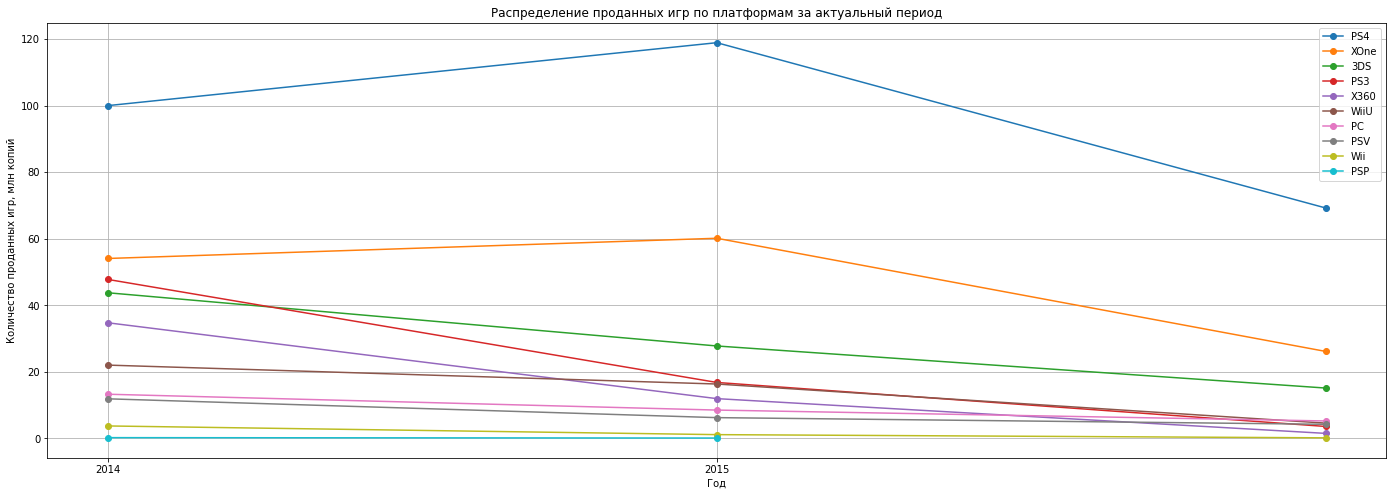

In [24]:
plt.figure(figsize=(24, 8))
for platform in actual_period_platforms:
    data_platform = actual_period_data[actual_period_data['platform'] == platform]
    plt.plot(data_platform['year_of_release'], data_platform['total_sales'], label=platform, marker='o')
plt.title('Распределение проданных игр по платформам за актуальный период')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр, млн копий')
plt.legend()
plt.grid(True)
plt.xticks(data_platform['year_of_release'].astype(int))
plt.show()

Судя по сводной таблице и линейным графикам, лидирует PS4. Второе место за XOne, третье — за Nintendo 3DS.

Учтём, что непонятно за какие месяца взяты данные за $2016$ год. Может быть, данные взяты только за первый квартал $2016$ года, потому что видно, что общие продажи не такие, как в $2014$ и $2015$ годах.

Падают или растут продажи будем судить по $2015$ году.

Рост продаж в $2015$ году у: Xbox One и PS4. Консоли свежие, тем более в $2016$ году у них будет технологическое улучшение. Потенциал выпуска игр на этих консолях высок.

Падение продаж в $2015$ году у:
1. PS3 и Xbox 360. Консоли старые, железо этих консолей просто устарело.
2. Консолей от Nintendo (WiiU, 3DS).
3. У портативной консоли от Sony PSV.

Ничтожные продажи у Wii и PSP.

Отдельно стоит выделить PC. Это перспективная платформа. Она никогда технически не устареет. Но у неё большая проблема — пиратство. 

**Итак, выбираем PS4, Xbox One и PC как потенциально важные (прибыльные).**

#### Распределение продаж по платформам

Используя данные за актуальный период, построим диаграмму размаха, показывающую распределение продаж по платформам.

In [25]:
actual_period_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


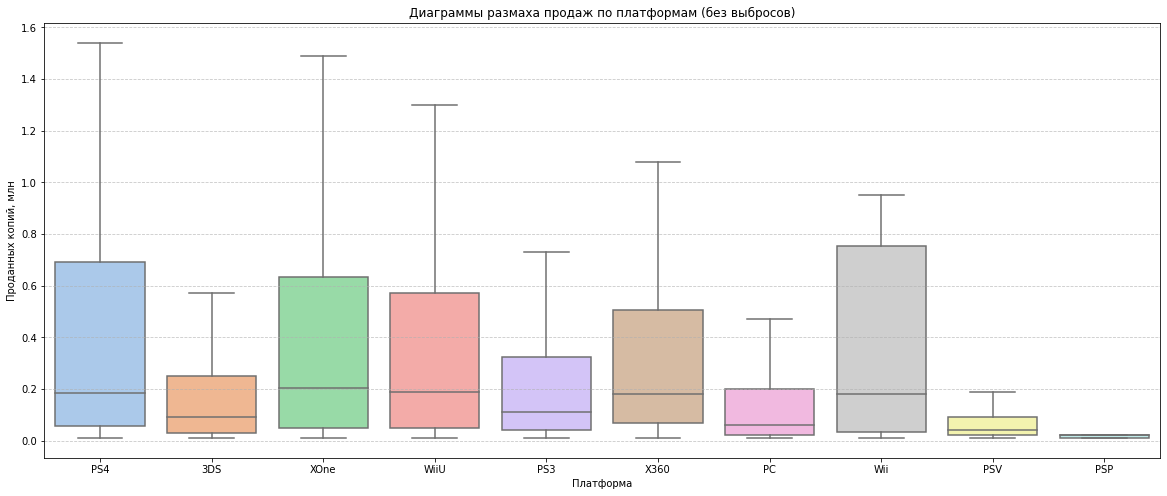

In [26]:
# диаграмма размаха
plt.figure(figsize=(20, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_period_df, showfliers=False, palette='pastel')
plt.title('Диаграммы размаха продаж по платформам (без выбросов)')
plt.xlabel('Платформа')
plt.ylabel('Проданных копий, млн')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Самая большая медиана — у **XOne**.\
Самый большой диапазон нормальных значений — у **PS4**.\
Самый большой межквартильный размах — у **Wii**.

<br>

#### Зависимость отзывов пользователей и критиков на продажи внутри лучших платформ по продажам игр

**Зависимость отзывов пользователей и критиков на продажи внутри платформы PS4**

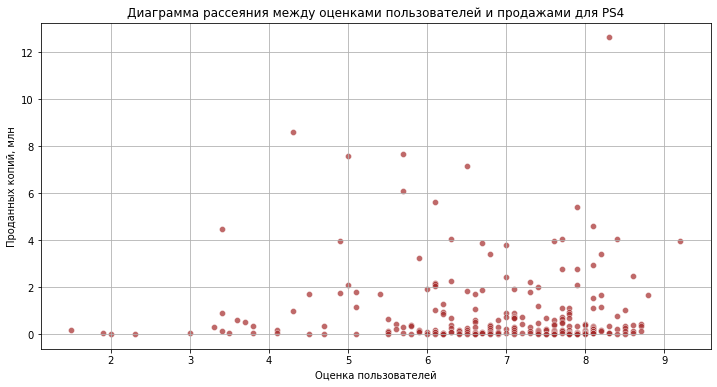

Коэффициент корреляции: -0.04013158947269733


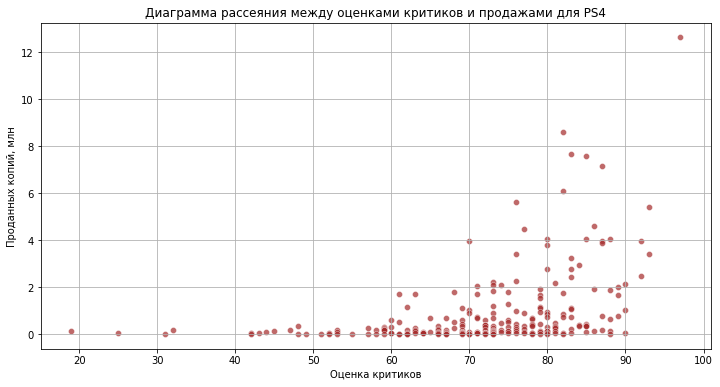

Коэффициент корреляции: 0.4026614106810409


In [27]:
# выбираем данные только для PS4
ps4_data = actual_period_df[actual_period_df['platform'] == 'PS4']

# диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()

ps4_critic_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Коэффициент корреляции: {ps4_critic_corr}')

# диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками критиков и продажами для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
ps4_user_corr = ps4_data['critic_score'].astype(float).corr(ps4_data['total_sales'])
print(f'Коэффициент корреляции: {ps4_user_corr}')

**Нет зависимости отзывов пользователей на продажи PS4 копий видеоигр.**

**Чем выше оценка критиков, тем скорее лучше продаётся игра на PS4.**

<br>

**Зависимость отзывов пользователей и критиков на продажи внутри платформы XOne**

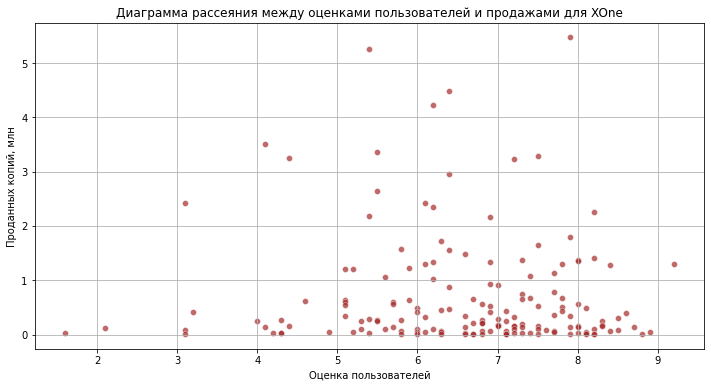

Коэффициент корреляции: -0.07038392806475809


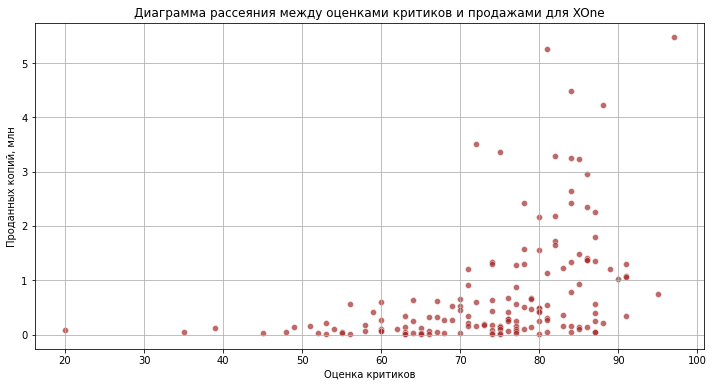

Коэффициент корреляции: 0.42867694370333187


In [28]:
# выбираем данные только для XOne
xone_data = actual_period_df[actual_period_df['platform'] == 'XOne']

# диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=xone_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()

xone_critic_corr = xone_data['user_score'].corr(xone_data['total_sales'])
print(f'Коэффициент корреляции: {xone_critic_corr}')

# диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками критиков и продажами для XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
xone_user_corr = xone_data['critic_score'].astype(float).corr(xone_data['total_sales'])
print(f'Коэффициент корреляции: {xone_user_corr}')

**Нет зависимости отзывов пользователей на продажи XOne копий видеоигр.**

**Чем выше оценка критиков, тем скорее лучше продаётся игра на XOne.**

<br>

**Зависимость отзывов пользователей и критиков на продажи внутри платформы 3DS**

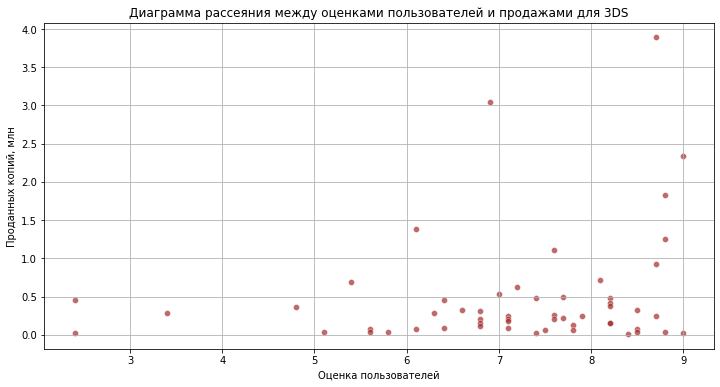

Коэффициент корреляции: 0.2151932718527028


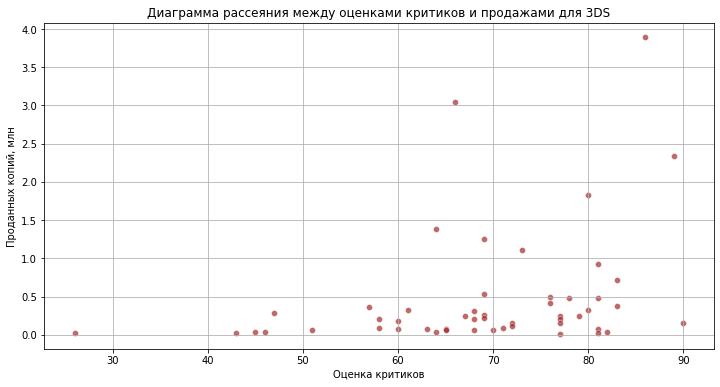

Коэффициент корреляции: 0.314117492869051


In [29]:
# выбираем данные только для 3DS
ds_data = actual_period_df[actual_period_df['platform'] == '3DS']

# диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ds_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()

ds_critic_corr = ds_data['user_score'].corr(ds_data['total_sales'])
print(f'Коэффициент корреляции: {ds_critic_corr}')

# диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ds_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками критиков и продажами для 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
ds_user_corr = ds_data['critic_score'].astype(float).corr(ds_data['total_sales'])
print(f'Коэффициент корреляции: {ds_user_corr}')

**Есть слабая зависимость оценки пользователей на продажи 3DS копий игр: чем выше оценка пользователя, тем лучше продажи.** 

**Есть слабая зависимость оценки критиков на продажи 3DS копий игр: чем выше оценка пользователя, тем лучше продажи.** 

<br>

**Зависимость отзывов пользователей и критиков на продажи внутри платформы PS3**

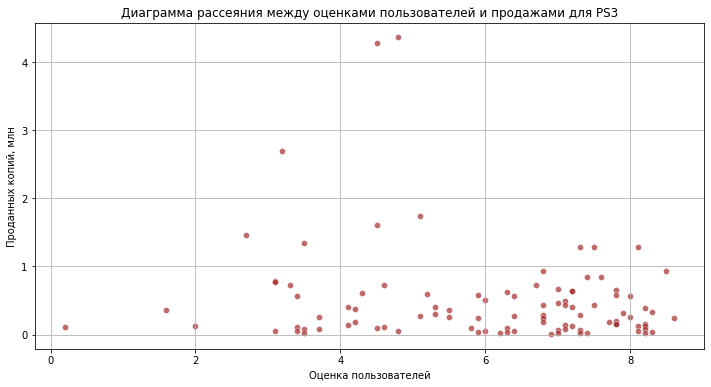

Коэффициент корреляции: -0.16676141347662118


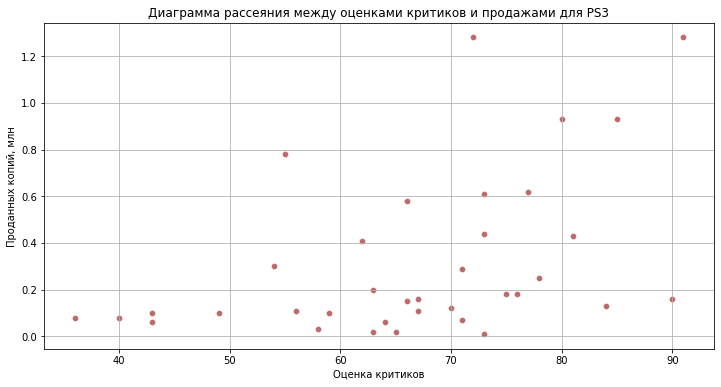

Коэффициент корреляции: 0.44657460493190704


In [30]:
# выбираем данные только для PS3
ps3_data = actual_period_df[actual_period_df['platform'] == 'PS3']

# диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps3_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
ps3_critic_corr = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f'Коэффициент корреляции: {ps3_critic_corr}')

# диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками критиков и продажами для PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
ps3_user_corr = ps3_data['critic_score'].astype(float).corr(ps3_data['total_sales'])
print(f'Коэффициент корреляции: {ps3_user_corr}')

**Есть слабая зависимость оценки пользователей на продажи PS3 копий игр: чем ниже оценка пользователя, тем лучше продажи.** 

**Чем выше оценка критиков, тем скорее лучше продаётся игра на PS3.**

<br>

**Зависимость отзывов пользователей и критиков на продажи внутри платформы X360**

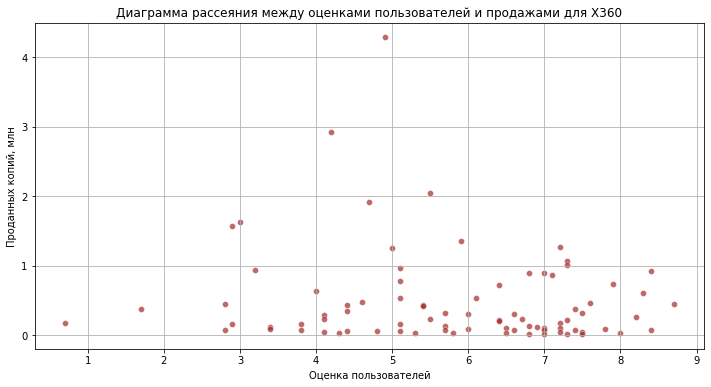

Коэффициент корреляции: -0.138444570945665


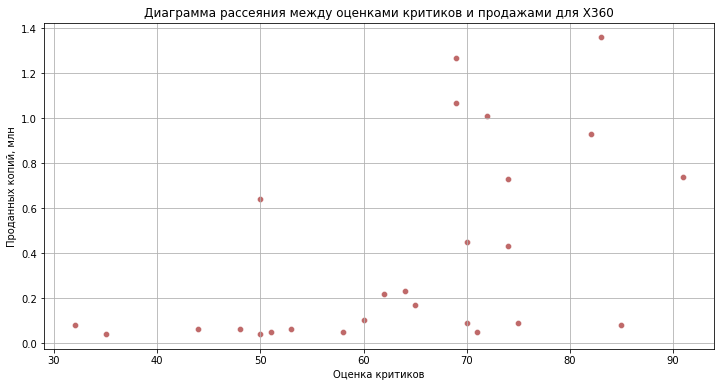

Коэффициент корреляции: 0.5257228356581523


In [31]:
# выбираем данные только для X360
x360_data = actual_period_df[actual_period_df['platform'] == 'X360']

# диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()

x360_critic_corr = x360_data['user_score'].corr(x360_data['total_sales'])
print(f'Коэффициент корреляции: {x360_critic_corr}')

# диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_data, color='brown', alpha=0.7)
plt.title('Диаграмма рассеяния между оценками критиков и продажами для X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданных копий, млн')
plt.grid(True)
plt.show()
x360_user_corr = x360_data['critic_score'].astype(float).corr(x360_data['total_sales'])
print(f'Коэффициент корреляции: {x360_user_corr}')

**Есть слабая зависимость оценки пользователей на продажи X360 копий игр: чем ниже оценка пользователя, тем лучше продажи.** 

**Чем выше оценка критиков, тем скорее лучше продаётся игра на X360.**

**Мы видим, что на этих платформах отзывы критиков влияют на количество проданных копий игр.** \
**Вклад пользователей или отсутствует или оказывает совсем незначительное влияние на продажи.**

<br>

#### Распределение игр по жанрам

In [32]:
actual_period_df.pivot_table(index='genre', values='total_sales', aggfunc=('mean','median','sum', 'count'))\
                .sort_values(by='median',ascending=False)\
                .reset_index()

,genre,count,mean,median,sum
0,Shooter,128,1.335469,0.515,170.94
1,Sports,161,0.680000,0.180,109.48
2,Platform,38,0.476053,0.140,18.09
3,Fighting,60,0.470333,0.125,28.22
4,Role-Playing,221,0.459005,0.110,101.44
5,Simulation,44,0.298409,0.100,13.13
6,Action,619,0.322068,0.090,199.36
7,Misc,113,0.332301,0.090,37.55
8,Racing,69,0.398841,0.090,27.52
9,Strategy,37,0.107027,0.060,3.96


Медиана — хорошая метрика для поиска прибыльных жанров.

**Самые прибыльные жанры: шутеры, спортивные симуляторы, платформеры.** \
Половина игр жанра шутер, например, продались экземплярами в количестве $515000$ штук.

**Самые игнорируемые жанры: адвенчуры, головоломки и стратегические игры.**

<br>

### Портрет пользователя каждого региона

#### Северная Америка (NA)

**1. Топ-5 платформ по проданным играм.**

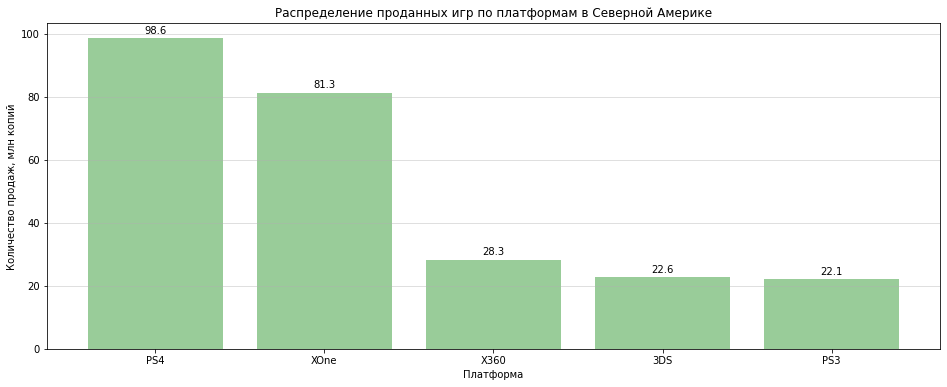

In [33]:
na_platform_sales = actual_period_df.groupby('platform')['na_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(na_platform_sales['platform'],
               na_platform_sales['na_sales'],
               color='g',
               alpha=0.4)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по платформам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**На консолях PS4 и XOne больше всего проданных игр.**

**2. Топ-5 жанров по проданным играм.**

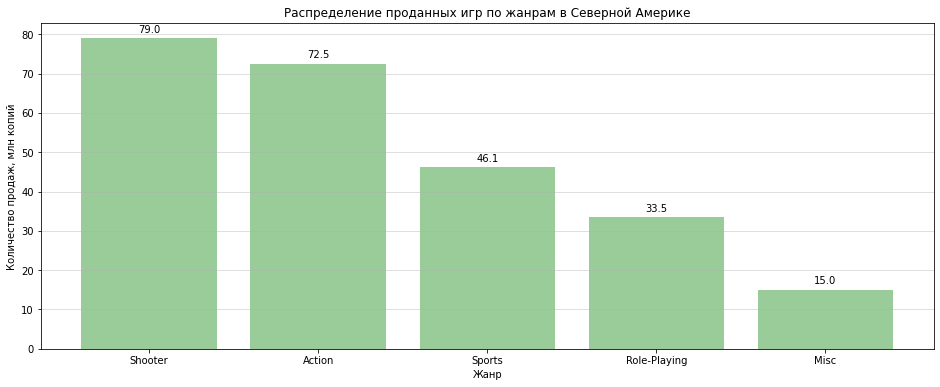

In [34]:
na_genre_sales = actual_period_df.groupby('genre')['na_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(na_genre_sales['genre'],
               na_genre_sales['na_sales'],
               color='g',
               alpha=0.4)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**В Северной Америке больше всего любят шутеры и экшены.**

**3. влияние рейтинга ESRB на продажи**

In [35]:
# для начала заполним все пропуски в колонке 'rating' на 'No rating'
actual_period_df.loc[:, 'rating'] = actual_period_df.loc[:, 'rating'].replace(np.nan, 'No rating')

C:\Users\miZnIce\practicum\practicum_env\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


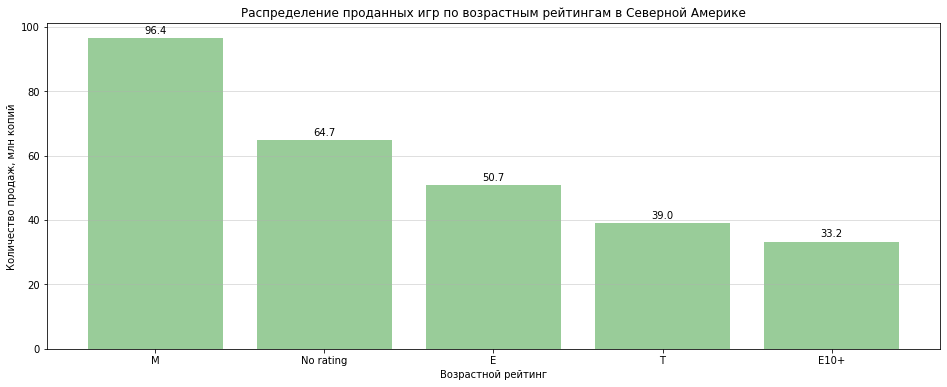

In [36]:
na_rating_sales = actual_period_df.groupby('rating')['na_sales']\
                                  .agg(sum)\
                                  .sort_values(ascending=False)\
                                  .reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(na_rating_sales['rating'],
               na_rating_sales['na_sales'],
               color='g',
               alpha=0.4)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по возрастным рейтингам в Северной Америке')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Проданные игры по возрастному рейтингу:**
1. Для совершеннолетних
2. Без рейтинга
3. Для всех

<br>

#### Европа (EU)

**1. Топ-5 платформ по проданным играм.**

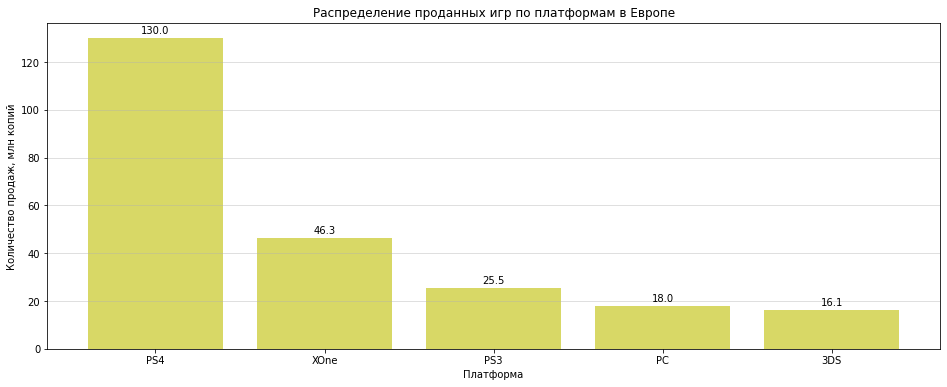

In [37]:
eu_platform_sales = actual_period_df.groupby('platform')['eu_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(eu_platform_sales['platform'],
               eu_platform_sales['eu_sales'],
               color='y',
               alpha=0.6)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**В Европе с большим отрывом лидирует PS4.**

**2. Топ-5 жанров по проданным играм.**

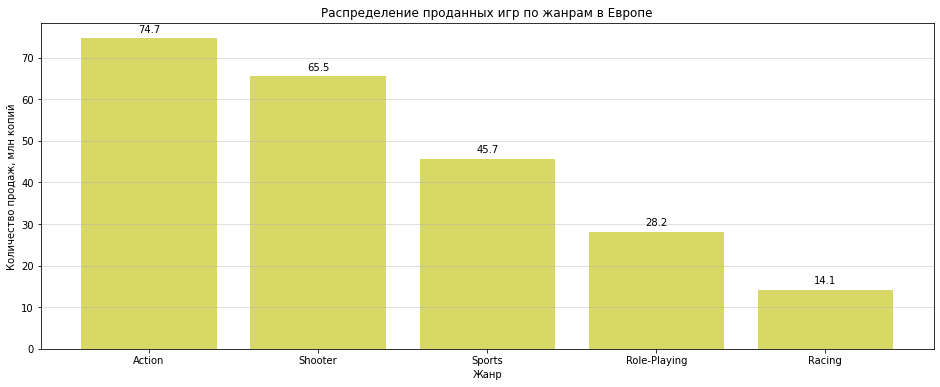

In [38]:
eu_genre_sales = actual_period_df.groupby('genre')['eu_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(eu_genre_sales['genre'],
               eu_genre_sales['eu_sales'],
               color='y',
               alpha=0.6)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**По жанрам картина такая же, как в Северной Америке. Любят экшены и шутеры.**

**3. влияние рейтинга ESRB на продажи**

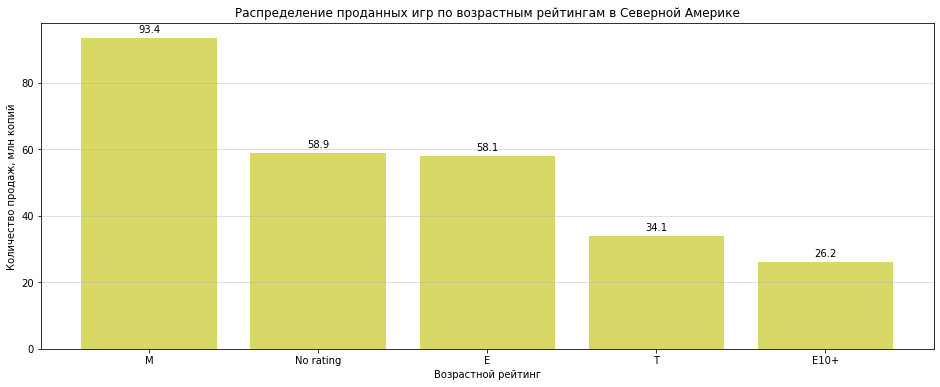

In [39]:
eu_rating_sales = actual_period_df.groupby('rating')['eu_sales']\
                                  .agg(sum)\
                                  .sort_values(ascending=False)\
                                  .reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(eu_rating_sales['rating'],
               eu_rating_sales['eu_sales'],
               color='y',
               alpha=0.6)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по возрастным рейтингам в Северной Америке')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**По возрастному рейтингу то же, что и в Америке. Любят игры не для детей. Второе и третье места у игр для всех и игр без рейтинга.**

<br>

#### Япония (JP)

**1. Топ-5 платформ по проданным играм**

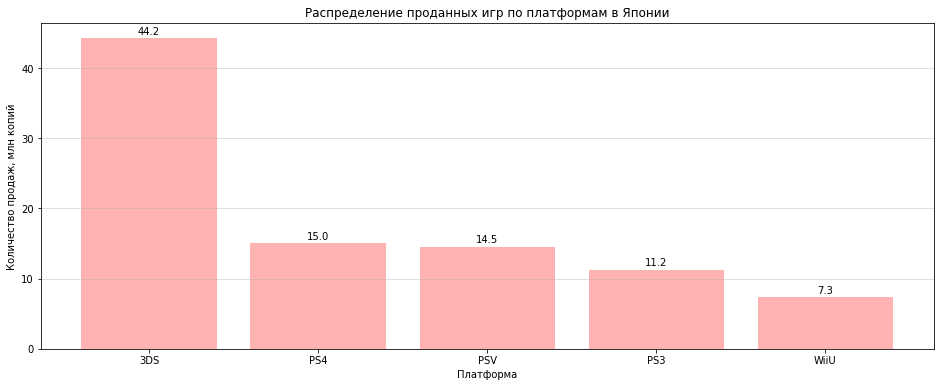

In [40]:
jp_platform_sales = actual_period_df.groupby('platform')['jp_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(jp_platform_sales['platform'],
               jp_platform_sales['jp_sales'],
               color='r',
               alpha=0.3)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**А вот японцы любят использовать портативные консоли, чтобы играть на ходу. Приставки из США вообще не пользуются спросом.**

**2. Топ-5 жанров по проданным играм**

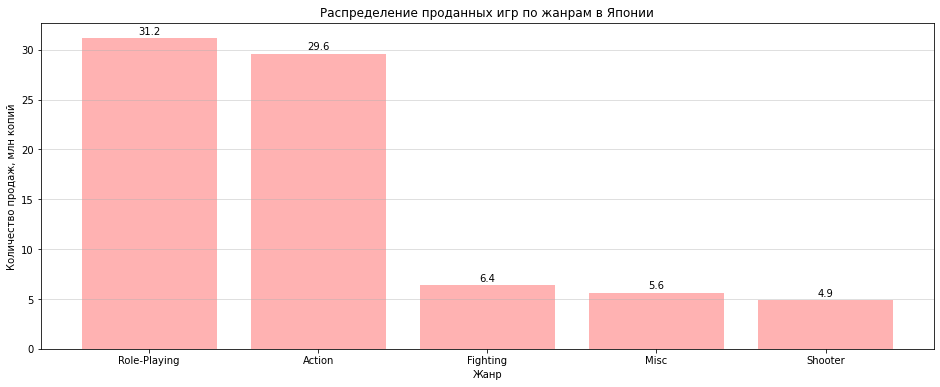

In [41]:
jp_genre_sales = actual_period_df.groupby('genre')['jp_sales'].agg(sum).nlargest(5).reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(jp_genre_sales['genre'],
               jp_genre_sales['jp_sales'],
               color='r',
               alpha=0.3)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Игроки Японии отдают предпочтение RPG играм. А экшенам — во вторую очередь.**

**3. влияние рейтинга ESRB на продажи**

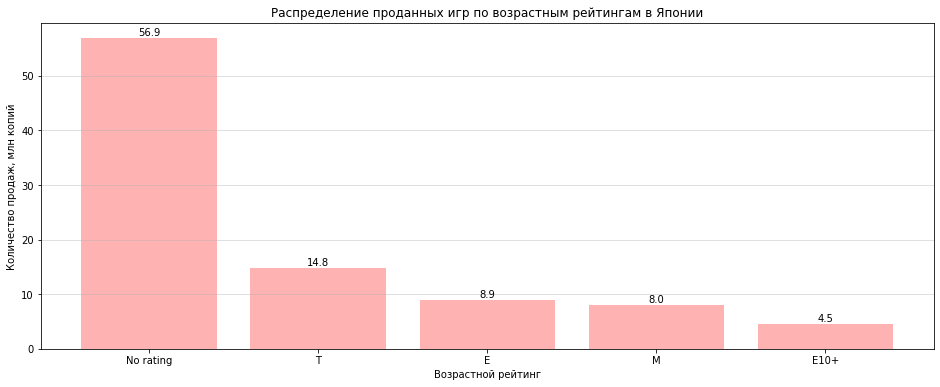

In [42]:
jp_rating_sales = actual_period_df.groupby('rating')['jp_sales']\
                                  .agg(sum)\
                                  .sort_values(ascending=False)\
                                  .reset_index()

plt.figure(figsize=(16, 6))
bars = plt.bar(jp_rating_sales['rating'],
               jp_rating_sales['jp_sales'],
               color='r',
               alpha=0.3)

# добавление значений над столбами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.title('Распределение проданных игр по возрастным рейтингам в Японии')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество продаж, млн копий')
plt.grid(axis='y', alpha=0.5)
plt.show()

**А в Японии с большим отрывом лидируют игры, возрастной рейтинг для которых неизвестен.**

<br>

## Проверка гипотез

Чтобы тест сработал, нужно разобраться с пропусками.

In [43]:
# вместо пропусков поставим заглушку
actual_period_df.loc[:, 'user_score'] = actual_period_df.loc[:, 'user_score'].replace(np.nan,-10)

# отфильтруем заглушку
actual_period_df = actual_period_df[actual_period_df['user_score'] != -10]

### Гипотеза 1

Нужно проверить гипотезу: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза: статистически значимой разницы между пользовательскими рейтингами платформ Xbox One и PC нет.\
Альтернативная гипотеза: есть статистически значимая разница между пользовательскими рейтингами платформ Xbox One и PC.

$H_0$: $μ_1-μ_2=0$\
$Н_1$: $μ_1-μ_2≠0$

Зададим стандартный уровень статистической значимости alpha: $0.05$

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать **t-тест**.

In [44]:
xone_user_score = actual_period_df[actual_period_df['platform'] == 'XOne']['user_score']
pc_user_score = actual_period_df[actual_period_df['platform'] == 'PC']['user_score']

results = stats.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

alpha = 0.05

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Есть статистически значимая разница между пользовательскими оценками платформ Xbox One и PC')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Статистически значимой разницы между пользовательскими оценками платформ Xbox One и PC нет.')

p-value: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу. Статистически значимой разницы между пользовательскими оценками платформ Xbox One и PC нет.


<br>

### Гипотеза 2

Проверка гипотезы: **средние пользовательские рейтинги жанров Action и Sports разные.**

Нулевая гипотеза: статистически значимой разницы между пользовательскими рейтингами жанров Action и Sports нет.\
Альтернативная гипотеза: есть статистически значимая разница между пользовательскими рейтингами жанров Action и Sports.

$H_0$: $μ_1-μ_2=0$\
$Н_1$: $μ_1-μ_2≠0$

Зададим стандартный уровень статистической значимости alpha: $0.05$

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать **t-тест**.

In [45]:
action_user_score = actual_period_df[actual_period_df['genre'] == 'Action']['user_score']
sports_user_score = actual_period_df[actual_period_df['genre'] == 'Sports']['user_score']

results = stats.ttest_ind(action_user_score, sports_user_score, equal_var=False)

alpha = 0.05

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Есть статистически значимая разница между пользовательскими рейтингами жанров Action и Sports')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Статистически значимой разницы между пользовательскими рейтингами жанров Action и Sports нет.')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу. Есть статистически значимая разница между пользовательскими рейтингами жанров Action и Sports


<br>

## Общий вывод

Обозначив актуальный период как 2014-2016, мы узнали многое:

1. Мы выяснили, какие платформы лидируют по продажам, растут или падают.\
Лидируют: PS4, XONE, 3DS.\
Растут: XONE, PS4.\
Падают: PS3, X360, WiiU, 3DS, PSV.\
Обозначили потенциально прибыльные платформы: PS4, XOne, PC.

2. По квартилям узнали о глобальных продажах игр в разбивке по платформам.\
Самая большая медиана — у **XOne**.\
Самый большой диапазон нормальных значений — у **PS4**.\
Самый большой межквартильный размах — у **Wii**.

3. Разобрались, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и посчитали корреляцию между отзывами и продажами.\
Оказалось, что отзывы критиков действительно влияют на продажи игр на всех платформах.

4. Узнали, какие самые прибыльные жанры.\
Самые прибыльные жанры: шутеры, спортивные симуляторы, платформеры.\
Половина игр жанра шутер, например, продались экземплярами в количестве $515000$ штук.

5. Составили портрет пользователя каждого региона.\
Северная Америка: на консолях PS4 и XOne больше всего проданных игр. Больше всего на континенте любят экшены и шутеры. Игры для совершеннолетних — самые популярные. Во вторую очередь идут игры с неизвестным возрастным рейтингом, третье место у игр для любых возрастов.
<br><br>
Европа: игроки Европы отдают предпочтение PS4 (самая популярная). Любят экшены и шутеры. Любят игры с возрастным рейтингом 18+. Второе и третье места у игр для любых возрастов и игр без возрастного рейтинга.
<br><br>
Япония: японцы любят использовать портативные консоли, чтобы играть на ходу. Приставки из США вообще не пользуются спросом. Отдают предпочтение RPG играм, а экшенам — во вторую очередь. В Японии с большим отрывом лидируют игры, возрастной рейтинг для которых неизвестен.

6. Проверили гипотезы и подтвердили, что:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports отличаются.

<b>Чтобы игра была успешной, ей нужно:</b>
1. выйти на PS4, XOne или PC;
2. получить признание критиков;
3. быть шутером, спортивным симулятором или платформером.

Закономерности, которые определяют успех игры, выявлены. И интернет-магазин `N` спланирует рекламную кампанию  на $2017$ год.